In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
import acquire
import prepare
from wordcloud import WordCloud
import nltk.sentiment
pd.set_option('display.max_colwidth', -1)
from time import strftime

import requests
from bs4 import BeautifulSoup
import time

<ipython-input-55-3152b67624db>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
# acquire.scrape_github_data()

In [7]:
# df = pd.DataFrame(acquire.scrape_github_data(),columns=['repo','language','readme_contents'])
# df.head()

In [8]:
# df

In [12]:
soup = BeautifulSoup(response.text)

In [ ]:
for i in range(1,10):
    response = requests.get('https://github.com/search?p={i}&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
    repos = soup.find_all('div', class_ = 'f4 text-normal')
    
    
    

In [9]:
response = requests.get('https://github.com/search?q=bitcoin', headers={'user-agent': 'DS Student'})


In [10]:
response.text

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-dkuYFW+ra8yYSt342e5pJEeslPSjMcrMvNxlYZMyM/X+/WJHDPvoCuGq3LFojI7B0dQWwZNRiPMnbi9IfUgTaA==" rel="stylesheet" href="https://github.githubassets.com/assets/light-764b98156fab6bcc984addf8d9ee6924.css" /><link crossorigin="anonymous" media="all" integrity="sha512-UrAu23+eyncWvaQFwsLbgSKtmLb2aH1bcT4hJnnRdkaPuY1eu9bumt33FyHHFDX8hskTUNWNkIsMCz7F

In [15]:
repos = soup.find_all('div', class_ = 'f4 text-normal')
repos

[<div class="f4 text-normal">
 <a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"bitcoin","result_position":1,"click_id":1181927,"result":{"id":1181927,"global_relay_id":"MDEwOlJlcG9zaXRvcnkxMTgxOTI3","model_name":"Repository","url":"https://github.com/bitcoin/bitcoin"},"originating_url":"https://github.com/search?q=bitcoin","user_id":null}}' data-hydro-click-hmac="2f9bb81948d1cfd1e2c586d2eda7f6f8900f679e47c524ada9abda2363ed2573" href="/bitcoin/bitcoin">bitcoin/<em>bitcoin</em></a>
 </div>,
 <div class="f4 text-normal">
 <a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"bitcoin","result_position":2,"click_id":12044132,"result":{"id":12044132,"global_relay_id":"MDEwOlJlcG9zaXRvcnkxMjA0NDEzMg==","model_name":"Repository","url":"https://github.com/bitcoinbook/bitcoinbook"},"originating_url":"https://github.com/search?q=bitcoin","us

In [18]:
repo = repos[0]
repo

<div class="f4 text-normal">
<a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"bitcoin","result_position":1,"click_id":1181927,"result":{"id":1181927,"global_relay_id":"MDEwOlJlcG9zaXRvcnkxMTgxOTI3","model_name":"Repository","url":"https://github.com/bitcoin/bitcoin"},"originating_url":"https://github.com/search?q=bitcoin","user_id":null}}' data-hydro-click-hmac="2f9bb81948d1cfd1e2c586d2eda7f6f8900f679e47c524ada9abda2363ed2573" href="/bitcoin/bitcoin">bitcoin/<em>bitcoin</em></a>
</div>

In [19]:
extension = repo.a.attrs['href']
extension 

'/bitcoin/bitcoin'

In [37]:
def get_extensions():
    extension_list = []
    for i in range(95,101):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [38]:
temp_list = get_extensions()
temp_list

['tip4commit/tip4commit',
 'mappum/bitcoin-protocol',
 'LarsHoldgaard/bitcoin-wrapper',
 'lbryio/lbrycrd',
 'kilimchoi/cryptocurrency',
 'renproject/multichain',
 'HelloZeroNet/zeronet.io',
 'doomhz/coinnext_engine',
 'livegnik/BitCoin-v0.01-ALPHA',
 'happyg1t/bitcoin-analysis',
 'mmick66/jswallet',
 'ElementsProject/lightning-charge',
 'weex/oscommerce-bitcoin',
 'stiggy87/ZynqBTC',
 'DissentDifference/DarkWallet',
 'circulosmeos/bitcoin-in-tiny-pieces',
 'shamoons/Kapitalize',
 'technologiespro/paper-wallet-generator',
 'scintill/php-bitcoin-signature-routines',
 'jdcloud-bds/bds-btc',
 'gcash/bchd',
 'SqueezerIO/squeezer',
 'Ayms/bitcoin-wallets',
 'dily3825002/awesome-blockchain',
 'Coldcard/firmware',
 'nayutaco/ptarmigan',
 'bitcoinfullnode/rokos-ok-bitcoin-fullnode',
 'ipld/go-ipld-btc',
 'ACINQ/phoenix',
 'Unthinkingbit/bitcointools',
 'indyjo/bitwrk',
 'Kamahl19/react-native-wallet',
 'prettymuchbryce/hellobitcoin',
 'bitcoin333/bitcoinbook',
 'BitcoinMafia/SpareCoinsExt',
 'g

<em class="current" data-total-pages="100">1</em>

In [36]:
len(temp_list)

NameError: name 'temp_list' is not defined

In [41]:
def get_extensions1():
    extension_list = []
    for i in range(90,95):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [42]:
temp_list2 = get_extensions1()
temp_list2

['keeshux/basic-blockchain-programming',
 'arcbtc/LNURLVend',
 'justinmoon/digital-cash',
 'richardgill/BitcoinEmissions',
 'PaulGregor/Bitcoin-Keys-Generator',
 'Cvar1984/pemulungBTC',
 '21dotco/two1-python',
 'dominictarr/feedopensource',
 'TheDoctorAI/AI-Trader',
 'bitcrystal/bitcoinexchange',
 'glv2/bruteforce-wallet',
 'ryanralph/altcoin-address',
 'BlueWallet/LndHub',
 'lightningnetwork/lnd',
 'GlacierProtocol/GlacierProtocol',
 'btccom/btcpool-ABANDONED',
 'coinorama/coinorama',
 'SF-Bitcoindevs/bitcoinjslib-wallet',
 'ethers/bitcoin-proof',
 'Bitcoin-sCrypt/Bitcoin-sCrypt',
 'wobine/blackboard101',
 'Bitcoinlightning/Bitcoin-Lightning',
 'hylinux1024/awesome-blockchain-articles',
 'bitsofproof/bop-bitcoin-client',
 'cloudhead/nakamoto',
 'samre12/gym-cryptotrading',
 'hippich/Faucet',
 'kanhavishva/BitCrack2',
 'ameijer/bitcoin_wallet_recovery_tool',
 'rsxm/bitrader',
 'chrisfranko/bitcoin-webskin',
 'jonasschnelli/dumb-block-explorer',
 'jalder/WHMCS-Bitcoin-Payment-Module',
 

In [90]:
len(temp_list2)

60

In [43]:
def get_extensions2():
    extension_list = []
    for i in range(85,90):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [44]:
temp_list3 = get_extensions2()
temp_list3

['fccoelho/Curso_Blockchain',
 'ashchan/bitcoin-ethereum-cryptography',
 'anfederico/cryptoview',
 'trezor/trezor-hardware',
 'vog/bitcoinproof',
 'bitpay/foxtrot',
 'organofcorti/bitcoin-blockchain-data',
 'changelly/api-changelly',
 'jonasschnelli/bitcoincore-indexd',
 'openblockchains/bitcoin-ponzi',
 'ivanbrugere/Bitcoin-Transaction-Network-Extraction',
 'Ebookcoin/ebookcoin',
 'benjamin-l-bc/Smart-Bitcoin-Auto-Trading-Bot-based-on-Nerual-Networks',
 'adamkrellenstein/unspendable',
 'stacks-network/pybitcoin',
 'badger-cash/badger',
 'bitcoin-intro/bitcoin-intro',
 'Jumpsu/klondike',
 'dan-da/hd-wallet-addrs',
 'kendricktan/misocoin',
 'bitcoinbrisbane/BitPoker',
 'javgh/greenaddress-pos-tools',
 'goncalopp/mexbtcapi',
 'xunxdd/bitcoin-news-charts',
 'stequald/bitcoin-sign-message',
 'cryptoapi/Python-Django-Flask-Bitcoin-Payments',
 'BUSEC/TumbleBit',
 'FreekPaans/bitcoin-multi-node-regtest',
 'phelix/easywinbuilder',
 'minershive/hiveos-asic',
 'bitcoin-resources/bitcoin-resource

In [46]:
len(temp_list3)

50

In [94]:
list_180 = temp_list + temp_list2 + temp_list3
list_180

['using-system/LightningPay',
 'drminnaar/react-bitcoin-monitor',
 'lbryio/lbrycrd',
 'ElementsProject/lightning-charge',
 'kilimchoi/cryptocurrency',
 'tip4commit/tip4commit',
 'LarsHoldgaard/bitcoin-wrapper',
 'mappum/bitcoin-protocol',
 'HelloZeroNet/zeronet.io',
 'renproject/multichain',
 'livegnik/BitCoin-v0.01-ALPHA',
 'doomhz/coinnext_engine',
 'happyg1t/bitcoin-analysis',
 'mmick66/jswallet',
 'DissentDifference/DarkWallet',
 'weex/oscommerce-bitcoin',
 'stiggy87/ZynqBTC',
 'palmall/WebBitcoinEscrow',
 'dily3825002/awesome-blockchain',
 'Coldcard/firmware',
 'circulosmeos/bitcoin-in-tiny-pieces',
 'shamoons/Kapitalize',
 'Ayms/bitcoin-wallets',
 'technologiespro/paper-wallet-generator',
 'jdcloud-bds/bds-btc',
 'scintill/php-bitcoin-signature-routines',
 'gcash/bchd',
 'SqueezerIO/squeezer',
 'nayutaco/ptarmigan',
 'bitcoinfullnode/rokos-ok-bitcoin-fullnode',
 'indyjo/bitwrk',
 'ipld/go-ipld-btc',
 'Kamahl19/react-native-wallet',
 'Unthinkingbit/bitcointools',
 'prettymuchbryce

In [45]:
len(list_180)

NameError: name 'list_180' is not defined

In [50]:
acquire.make_json()

repo          language  \
0    using-system/LightningPay         C#                 
1    drminnaar/react-bitcoin-monitor   JavaScript         
2    lbryio/lbrycrd                    C++                
3    ElementsProject/lightning-charge  JavaScript         
4    kilimchoi/cryptocurrency          None               
..                        ...           ...               
175  justinmoon/digital-cash           Python             
176  richardgill/BitcoinEmissions      None               
177  BlueWallet/LndHub                 JavaScript         
178  Cvar1984/pemulungBTC              PHP                
179  TheDoctorAI/AI-Trader             Jupyter Notebook   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [6]:
dont_stop_me_git_hub = [8,16,24,32,40,48,56,64,72,80,88,96]

In [9]:
def get_extensions3():
    extension_list = []
    for i in range(80,85):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [10]:
temp_list4 = get_extensions3()
temp_list4

['mikegogulski/bitcoin-wp-e-commerce',
 'coinbase/coinbase-commerce-woocommerce',
 'geek-at/phptrader',
 'nbobtc/BitcoindBundle',
 'coinspark/php-OP_RETURN',
 'rahulworld/bitcoin-prediction',
 'interplanaria/bitbus',
 'londonappbrewery/bitcoin-flutter-gold-start',
 'C-Otto/rebalance-lnd',
 'bernardladenthin/BitcoinAddressFinder',
 'lightning/blips',
 'bitpay/i-made-this',
 'blockstrap/framework',
 'ElementsProject/filebazaar',
 'lnbits/lnbits-legend',
 'bkerley/bitcoind',
 'tyler-smith/go-bip39',
 'peterdurham/bitcoin-api',
 'jlopp/bitcoin-utils',
 'NGUtech/bitcoin-stack',
 'greenaddress/GreenBits',
 'markblundeberg/coinsplitter',
 'ggyisub/BitcoinPlatinum',
 'NightfallGT/BTC-Clipper',
 'CMU-440-F16/p1',
 'interplanaria/neonplanaria',
 'OpenAssets/open-assets-protocol',
 'BitcoinFiles/bitcoinfiles-sdk',
 'uphold/docker-bitcoin-abc',
 'slickage/baron',
 'qtumproject/qtum',
 'blockchain/My-Wallet-V3-iOS',
 'mrk-9/Trajans-Marketplace_Angular.js',
 'pandoracore/bitcoin-pro',
 'SandroMachad

In [11]:
def get_extensions4():
    extension_list = []
    for i in range(75,80):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [13]:
temp_list5 = get_extensions4()
temp_list5

['trezor/python-trezor',
 'bitpay/bitcoin-brand',
 'suhithr/bitcoin-arbitrage-bot',
 'RavenProject/Ravencoin',
 'goteppo/ArBit',
 'Tucsky/aggr',
 'omaidf/Bitcoin-Slot-Casino',
 'amitiuttarwar/bitcoin-bytes',
 'ExodusMovement/cryptocompare',
 'BitcoinDesign/Bitcoin-Icons',
 'Spenzert/CoinFaucet',
 'kevinkinnett/BitSharp',
 'gavinandresen/paymentrequest',
 'JoinMarket-Org/joinmarket-clientserver',
 'MatthewLM/cbitcoin',
 'recoded-co/coinmap',
 'hoanghiephui/Bitcoin-Wallet',
 'LedgerHQ/ledger-javacard',
 'moki74/laravel-btc',
 'altangent/lnd-explorer',
 'fireduck64/SockThing',
 'Xel/Blockchain-stuff',
 'baleato/bitcoin-hackathon',
 'Jorijn/bitcoin-dca',
 'prouast/cryptocurrency-analysis',
 'derjanb/hamiyoca',
 'rust-bitcoin/rust-bech32-bitcoin',
 'realindiahotel/BitcoinUtilities.NET',
 'bitcoinz-wallets/bitcoinz-copay-wallet',
 'quartzjer/pennybank',
 'josephmachado/bitcoinMonitor',
 'blockchain/bitcoin-coinify-client',
 'Bitcoin-com/cashscript',
 'jamesob/coldcore',
 'consensusRealityIO/

In [15]:
def get_extensions5():
    extension_list = []
    for i in range(70,75):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [16]:
temp_list6 = get_extensions5()
temp_list6

['mjhea0/thinkful-angular',
 'TronWallet/tokens',
 'freqtrade/freqtrade',
 'btclib-org/btclib',
 'pmlaw/The-Bitcoin-Foundation-Legal-Repo',
 'shadow/shadow-plugin-bitcoin',
 'bradtraversy/bitzprice',
 'codebasics/cool_python_apps',
 'Bit-Wasp/bitcoin-p2p-php',
 'keskival/cryptocurrency-course-materials',
 'JWWeatherman/bitcoin_security_threat_model',
 'lightningnetworkstores/lightningnetworkstores.github.io',
 'bitcrystal/bitcoinexchange-final',
 'cloudzombie/BitcoinDice',
 'ervwalter/bitcoin-command',
 'tomitokko/bitcoinwallet',
 'julianYaman/bitcoin-clicker',
 'Amitha353/Bitcoin-and-Cryptocurrency-Technologies',
 'melihbodr/Bitcoin_Analysis-',
 'anders94/bitcoin-2-of-3-multisig',
 'Phunk87/bitcoin_developer_guide',
 'SjorsO/keys-generator',
 'MatthewGaber/ESP8266BitcoinMiner',
 'rust-bitcoin/rust-miniscript',
 'Frankenmint/PKGenerator_Checker',
 'nederhoed/python-bitcoinaddress',
 'p2p/bitcoin-exchange',
 'knowm/XChange',
 'Bit-Wasp/secp256k1-php',
 'jlopp/bitcoin-politicians',
 'Nxt

In [19]:
def get_extensions6():
    extension_list = []
    for i in range(65,70):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [20]:
temp_list7 = get_extensions6()
temp_list7

['perone/protocoin',
 'shobrook/BitVision',
 'BTCPrivate-Legacy/bitcoin-private-full-node-wallet',
 'Bitcoin-com/developer.bitcoin.com',
 'mayosmith/openbitcoinatm',
 'chaincodelabs/bitcoinperf',
 'cointastical/P2P-Trading-Exchanges',
 'block-core/blockcore',
 'lncm/docker-bitcoind',
 'routman/brainwallet.io',
 'Bitcoin-ABC/bitcoinabc.org',
 'adrijano/Bitbruter',
 'lbotsch/wireshark-bitcoin',
 'ad-si/bitcoinate',
 'Sea-of-BTC/Bitcoin-Trading-Client',
 'cryptoadvance/specter-desktop',
 'cryptocoinjs/hdkey',
 'hophacker/bitcoin_public_data',
 'arcbtc/bowser-bitcoin-hardware-wallet',
 'greenaddress/bitcoin_ndk',
 'AleoHQ/wagyu',
 'bitcoinjs/bip44-constants',
 'valerio-vaccaro/Bitcoin-dashboard',
 'mndrix/network-bitcoin',
 'bitpay/wordpress-ecommerce-plugin',
 'cmu440/p1',
 'pavlovdog/bitcoin_in_a_nutshell',
 'cdecker/btcresearch',
 'rsksmart/bitcoin',
 'simpleledger/BitcoinFilesJS',
 'vrajroham/laravel-bitpay',
 'coinspark/python-OP_RETURN',
 'ethereum/btcrelay',
 'digitalbitbox/bitbox-b

In [22]:
def get_extensions7():
    extension_list = []
    for i in range(60,65):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [23]:
temp_list8 = get_extensions7()
temp_list8

['mmailhos/cpu-bitcoin-miner',
 'jedi95/Phoenix-Miner',
 'Samourai-Wallet/bitcoinj',
 'rustyrussell/bitcoin-storage-guide',
 'cychai/MasterBitcoin2CN',
 'ladimolnar/BitcoinBlockchain',
 'mpegavi/bitcoincn',
 'StealingBitcoinWithMath/StealingBitcoinWithMath',
 'dirtyfilthy/bc_key',
 'bitcoinhush/bitcoinhush',
 'philsong/btcrobot',
 'kramble/DE0-Nano-BitCoin-Miner',
 'nomic-io/bitcoin-peg',
 'MrMaxweII/Bitcoin-Address-Generator',
 'TheDen/btc-heist',
 'freqtrade/freqtrade-strategies',
 'maaku/python-bitcoin',
 'viabtc/mineragent',
 's0md3v/Orbit',
 'justinlynn/bitcoin-ex',
 'Lily-Technologies/lily-wallet',
 'yasinkuyu/binance-trader',
 'pox/EndTheFUD',
 'RobKohr/PHP-Bitcoin-Address-Creator',
 'brendio/convertphrase',
 'trustwallet/wallet-core',
 'jvstein/bitcoin-prometheus-exporter',
 'viciousstar/BitcointalkSpider',
 'bitcoinj/bitcoinj.github.io',
 'vbuterin/cult-of-craig',
 'unwriter/Bitcom',
 'bitrich-info/xchange-stream',
 'londonappbrewery/Bitcoin-Ticker-iOS11',
 'beldur/kraken-go-a

In [25]:
def get_extensions8():
    extension_list = []
    for i in range(55,60):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [26]:
temp_list9 = get_extensions8()
temp_list9

['obulpathi/bitcoinpy',
 'arcbtc/bitcoinPoS',
 'SoftwareVerde/bitcoin-verde',
 'atlaschiew/bitcoin-cryptocurrency-tutorial',
 'maraoz/proofofexistence',
 'lightning-power-users/node-launcher',
 'guo-yu/btc',
 'jgarzik/txtool',
 'achow101/btcinformation.org',
 'bitrinjani/r2',
 'ragmondo/BitcoinWifi',
 'bitcoinjs/coinselect',
 'westrik/bitcoin',
 'ANONGHOST666/Bitcoin-Grabber',
 'steven2358/BitcoinSneakPeek',
 'kyuupichan/bitcoinX',
 'hostvpn/whmcs-coinbase-bitcoin',
 'jangorecki/Rbitcoin',
 'prusnak/addrgen',
 'blockchain/My-Wallet-V3',
 'ghidraninja/game-boy-bitcoin-miner',
 'AustEcon/bitsv',
 'btcsuite/Paymetheus',
 'ProgrammingBlockchain/ProgrammingBlockchain',
 'bitcoin-atom/bitcoin-atom',
 'Samourai-Wallet/sentinel-android',
 'subhan-nadeem/bitcoin-mining-python',
 'IBM/secure-bitcoin-wallet',
 'mhanne/block_browser',
 'limpbrains/django-cc',
 'bitcoin-core/guix.sigs',
 'navcoin/navcoin-core',
 'bitcoinjs/bitcoin-ops',
 'darkwallet/python-obelisk',
 'trezor/python-mnemonic',
 'Thi

In [29]:
def get_extensions9():
    extension_list = []
    for i in range(50,55):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [30]:
temp_list10 = get_extensions9()
temp_list10

['rust-bitcoin/murmel',
 'spesmilo/electrumx',
 'sebaslogen/bitcoin-price-ticker',
 'jamaljsr/polar',
 'jgarzik/picocoin',
 'BlockchainCommons/Bitcoin-Standup-Scripts',
 'kanhavishva/KeyHunt-Cuda',
 'gavinandresen/bitcoin_miningsim',
 'aarreedd/bitcoinabuse.com',
 'SimplGy/bitcoin',
 'mhanne/bitcoin-ruby-blockchain',
 'dev0p0/BitcoinCrack',
 'bitcoin-vr/bitcoin-vr',
 'btc-room101/bitcoin-rnn',
 'weex/addrgen',
 'zhiquan911/chance_btc_wallet',
 'soffes/coins',
 'LinusU/php-bitcoin-address-validator',
 'jtauber/blockchain',
 'nieldlr/Bitcoin-Node-Api',
 'bitcoindevkit/bitcoindevkit.org',
 'zquestz/docker-bitcoin',
 'bitcoincash-wallet/bitcoincashj',
 'mycroft/chainstate',
 'esotericnonsense/bitcoind-ncurses2',
 'bitcoin-core/docs',
 'miohtama/bitcoinaddress.js',
 'teknohog/Xilinx-Serial-Miner',
 'BitStore/BitStore-iOS',
 'jheusser/satcoin',
 'dhimmel/bitcoin-whitepaper',
 'msilb/coursera-cryptocurrency',
 'vinumeris/lighthouse',
 'mikkeluk/BitcoinQRCode.org',
 'karpathy/cryptos',
 'preic

In [31]:
def get_extensions10():
    extension_list = []
    for i in range(45,50):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [32]:
temp_list11 = get_extensions10()
temp_list11

['londonappbrewery/bitcoin-flutter-final',
 'vedmant/my-little-bitcoin',
 'panditanvita/BTCpredictor',
 'libbitcoin/libbitcoin-client',
 'kallerosenbaum/grokkingbitcoin',
 'sutra/okcoin-client',
 'edrevo/coinffeine',
 'saracen/bitcoin-all-key-generator',
 'laanwj/bitcoin-qt',
 'StorjOld/bitcointalkbot',
 'harishpuvvada/BitCoin-Value-Predictor',
 'electrumsv/electrumsv',
 'chaors/Bitcoin_read',
 'comboy/bitcoin-elixir',
 'ElementsProject/elements',
 'arcbit/arcbit-ios',
 'bitaps-com/pybtc',
 'bitcoinjs/bip39',
 'vbuterin/btckeysplit',
 'keep-network/tbtc-website',
 'joarleymoraes/lousy_bitcoins',
 'micro-bitcoin/uBitcoin',
 'chaintope/bitcoinrb',
 'hstove/rbtc_arbitrage',
 'c00w/bitHopper',
 'ascribe/transactions',
 'mhanne/bitcoin-ruby-node',
 'unchained-capital/unchained-bitcoin',
 'BitcoinQnA/BitcoinPrivacyGuide',
 'Isaacdelly/Plutus',
 'jlopp/lopp.net',
 'bitcoin-dot-org/Bitcoin-Wallet',
 'bitcoin-core/bitcoin-detached-sigs',
 'trezor/trezor-core',
 'cpacia/bchutil',
 'libbitcoin/li

In [33]:
def get_extensions11():
    extension_list = []
    for i in range(40,45):
        time.sleep(.8)
        response = requests.get('https://github.com/search?p='+str(i)+'&q=bitcoin&type=Repositories', headers={'user-agent': 'DS Student'})
        soup = BeautifulSoup(response.text)
        repos = soup.find_all('div', class_ = 'f4 text-normal')
        for repo in repos:
            time.sleep(.8)
            extension = repo.a.attrs['href']
            extension_list.append(extension)
    extension_list = [n[1:] for n in extension_list]
    return extension_list

In [34]:
temp_list12 = get_extensions11()
temp_list12

['behas/bitcoingraph',
 'mertceyhan/bitcoin-market-android',
 'OutCast3k/coinbin',
 'githubocto/flat-demo-bitcoin-price',
 'rootzoll/raspiblitz',
 'mempool/mempool',
 'mynodebtc/mynode',
 'gitchain/gitchain',
 'trezor/connect',
 'aneonex/BitcoinChecker',
 'arikan/bitcoin-voting',
 'zlq4863947/triangular-arbitrage',
 'Greedi/bitcoin-faucet',
 'doomhz/coinnext',
 'consenlabs/token-core-android',
 'chaincodelabs/seminars',
 'kenken64/bitcoin-order-app',
 'BtcGroupCn/BitcoinDeveloperGuide_zhcn',
 'bitcoin-portal/bitcoin-wallet-releases',
 'laowais/bitcoindark',
 'intrd/bitcoin-hal10k',
 'hexonaut/bitcoin-transaction',
 'libbitcoin/libbitcoin-consensus',
 'miaolz123/samaritan',
 'mb300sd/Bitcoin-Tool',
 'libbitcoin/libbitcoin-server',
 'zw3639/BitcoinCracker',
 'Toporin/BitcoinCore',
 'keeshux/bitcoinspv',
 'libbitcoin/libbitcoin-node',
 'trezor/trezor-crypto',
 'solana-labs/solana',
 'zw/bitcoin-gh-meta',
 'ruigomeseu/bitcoin-address-validation',
 'lwjaiyjk/bitcoin-comment-0.1.0',
 'bitaut

In [47]:
big_list = temp_list + temp_list2 + temp_list3 + temp_list4 + temp_list5 + temp_list6 + temp_list7 + temp_list8 + temp_list9 + temp_list10 + temp_list11 + temp_list12

In [48]:
len(big_list)

590

In [49]:
big_list

['tip4commit/tip4commit',
 'mappum/bitcoin-protocol',
 'LarsHoldgaard/bitcoin-wrapper',
 'lbryio/lbrycrd',
 'kilimchoi/cryptocurrency',
 'renproject/multichain',
 'HelloZeroNet/zeronet.io',
 'doomhz/coinnext_engine',
 'livegnik/BitCoin-v0.01-ALPHA',
 'happyg1t/bitcoin-analysis',
 'mmick66/jswallet',
 'ElementsProject/lightning-charge',
 'weex/oscommerce-bitcoin',
 'stiggy87/ZynqBTC',
 'DissentDifference/DarkWallet',
 'circulosmeos/bitcoin-in-tiny-pieces',
 'shamoons/Kapitalize',
 'technologiespro/paper-wallet-generator',
 'scintill/php-bitcoin-signature-routines',
 'jdcloud-bds/bds-btc',
 'gcash/bchd',
 'SqueezerIO/squeezer',
 'Ayms/bitcoin-wallets',
 'dily3825002/awesome-blockchain',
 'Coldcard/firmware',
 'nayutaco/ptarmigan',
 'bitcoinfullnode/rokos-ok-bitcoin-fullnode',
 'ipld/go-ipld-btc',
 'ACINQ/phoenix',
 'Unthinkingbit/bitcointools',
 'indyjo/bitwrk',
 'Kamahl19/react-native-wallet',
 'prettymuchbryce/hellobitcoin',
 'bitcoin333/bitcoinbook',
 'BitcoinMafia/SpareCoinsExt',
 'g

In [51]:
# Part 1 Accquistion of JSON file

In [75]:
original = pd.read_json('repo_readmes_pj.json')
df=original.copy()
df.head()

repo    language  \
0  using-system/LightningPay         C#           
1  drminnaar/react-bitcoin-monitor   JavaScript   
2  lbryio/lbrycrd                    C++          
3  ElementsProject/lightning-charge  JavaScript   
4  kilimchoi/cryptocurrency          None         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [76]:
# There was duplicate data
df = df.drop_duplicates()

In [77]:
df = prepare.prep_readme_data(df, 'readme_contents', extra_words=[], exclude_words=[])
df.sample(10)

repo      language  \
7    mappum/bitcoin-protocol                JavaScript     
131  changelly/api-changelly                JavaScript     
82   Bitcoin-sCrypt/Bitcoin-sCrypt          C++            
142  kendricktan/misocoin                   Python         
86   hippich/Faucet                         Perl           
11   doomhz/coinnext_engine                 CoffeeScript   
125  ashchan/bitcoin-ethereum-cryptography  None           
70   21dotco/two1-python                    Python         
128  organofcorti/bitcoin-blockchain-data   R              
53   JTuwiner/btcvol                        JavaScript     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [78]:
# keep just the lementized clean content of readme
df=df.drop(columns=['readme_contents', 'clean', 'stemmed'])
df.head()

repo    language  \
0  using-system/LightningPay         C#           
1  drminnaar/react-bitcoin-monitor   JavaScript   
2  lbryio/lbrycrd                    C++          
3  ElementsProject/lightning-charge  JavaScript   
4  kilimchoi/cryptocurrency          None         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [79]:
# Fill null langauges with wunknown value
df.language.fillna(value='Unknown',inplace=True)


In [80]:
def common_language(string):
    """
    Takes in a string and compares it to a predefined user list
    if string not in list changes to 'Other'
    """
    language_list= ['JavaScript', 'Python', 'C++', 'PHP', 'C', 'Java']
    if string not in language_list:
        string = 'Other'
    return string

In [81]:
# Save the names of the top 5 programming languages, and change the rest to 'Other'
df['language'] = df.language.apply(common_language)

In [82]:
# SPLIT
from sklearn.model_selection import train_test_split
# Test set is .2 of original dataframe
train, test = train_test_split(df, test_size = .2, random_state=123, stratify= df.language)
# The remainder is here divided .7 to train and .3 to validate
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify= train.language)
train.shape, validate.shape, test.shape
# ------------------------


((89, 3), (39, 3), (32, 3))

In [83]:
# combine all contents in single string by language

from prepare import *

JavaScript_words = basic_clean(' '.join(df[df.language == 'JavaScript'].lemmatized))
Python_words = basic_clean(' '.join(df[df.language == 'Python'].lemmatized))
C_plus_plus_words = basic_clean(' '.join(df[df.language == 'C++'].lemmatized))
PHP_words = basic_clean(' '.join(df[df.language == 'PHP'].lemmatized))
java_words = (' '.join(train[train.language == 'Java'].lemmatized))
Other_words = basic_clean(' '.join(df[df.language == 'Other'].lemmatized))

all_words = basic_clean(' '.join(df.lemmatized))

In [84]:
JavaScript = pd.DataFrame(pd.Series(JavaScript_words.split()))
C_plus_plus = pd.DataFrame(pd.Series(C_plus_plus_words.split()))

In [85]:
languages_words_list = [
JavaScript_words,
Python_words,
C_plus_plus_words,
PHP_words,
Other_words]

## Explore

In [86]:
# represent contents as word frequencies

In [87]:
JavaScript_freq = pd.Series(JavaScript_words.split()).value_counts()
python_freq = pd.Series(Python_words.split()).value_counts()
C_plus_plus_freq = pd.Series(C_plus_plus_words.split()).value_counts()
PHP_freq = pd.Series(PHP_words.split()).value_counts()
Other_freq = pd.Series(Other_words.split()).value_counts()

all_freq = pd.Series(all_words.split()).value_counts()

In [88]:
word_counts = pd.concat([
JavaScript_freq,
python_freq,
C_plus_plus_freq,
PHP_freq,
Other_freq,
all_freq
], axis=1).fillna(0).astype(int)
word_counts.columns = ['JavaScript',
'python',
'C_plus_plus',
'PHP',
'Other',
'all']
word_counts.head()

,JavaScript,python,C_plus_plus,PHP,Other,all
td,321,0,0,0,4,325
transaction,206,36,4,5,109,365
bitcoin,179,107,45,42,349,762
done,171,4,4,0,19,199
address,151,56,107,71,74,474


In [89]:
def top_20_bigram(words):
    top_20_bi= (pd.Series(nltk.ngrams(words.split(), 2)).value_counts().head(20))
    return top_20_bi    

In [90]:
python_top_words = top_20_bigram(Python_words)
python_top_words.head()

(0, r)             73
(00000, n)         63
(0, obj)           59
(9, 9)             56
(scqtp4, eqgki)    40
dtype: int64

In [92]:
def create_bi_graph(bigram):
    bigram.sort_values().plot.barh(color = 'pink', width = .9, figsize = (16,10))
    plt.title('20 most frequently occuring bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')
    ticks, _ = plt.yticks()
    labels = bigram.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    

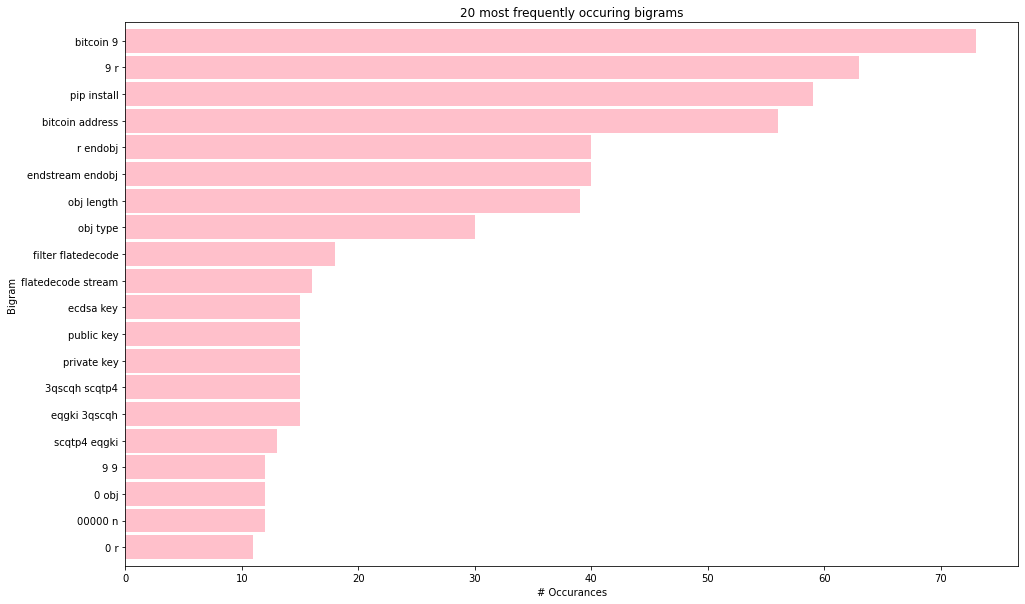

In [93]:
create_bi_graph(python_top_words)

# Modeling

### Create Baseline

In [95]:
df.language.value_counts()

Other         50
JavaScript    36
Python        32
C++           15
PHP           14
C             8 
Java          5 
Name: language, dtype: int64

In [ ]:
df.lang

In [ ]:
### Bag of words

In [ ]:
# using bag of words
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer()